In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [14]:
dir = "D:/Ai/dataset_cut/"

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
                               #width_shift_range=0.2, #좌우 이동
                               #height_shift_range=0.2, #상하 이동
                               #zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #????

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2) #train:test = 8:2

In [17]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (180,180),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 8669 images belonging to 3 classes.
Found 1768 images belonging to 3 classes.


In [18]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

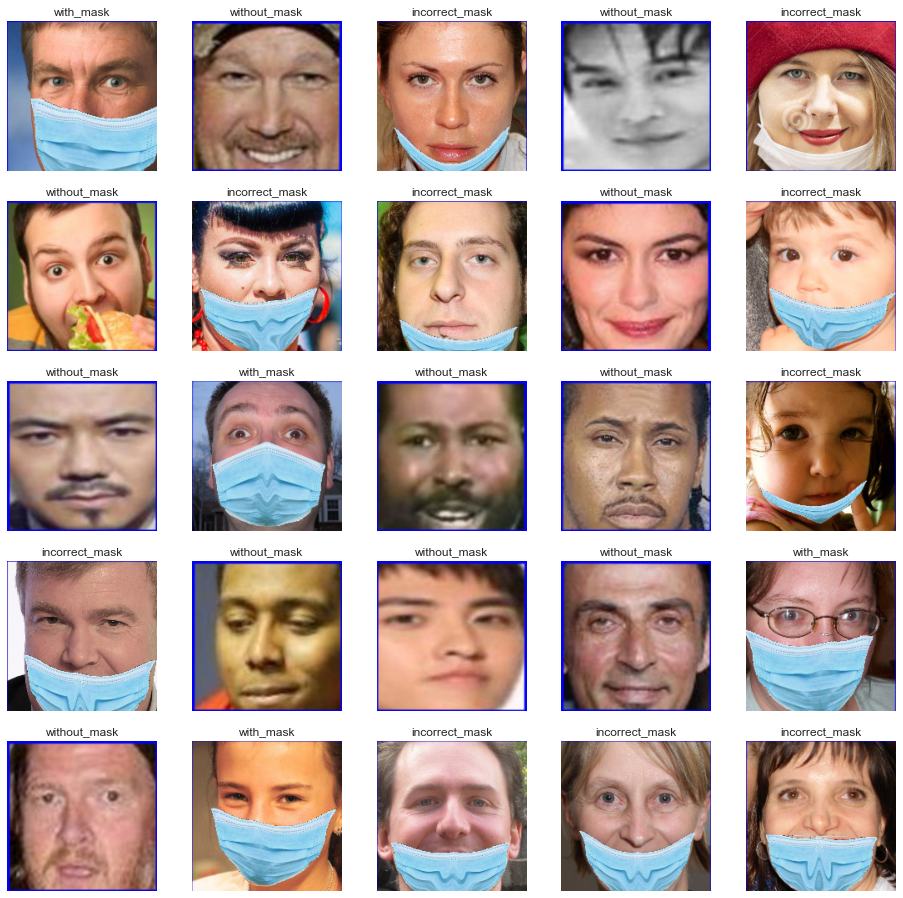

In [19]:
plt.figure(figsize = (16,16))

for i in range(25): #최대 25
    image,label = train_data.next()

    plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(labels[tf.argmax(label[i])])
    plt.axis("off")

In [20]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(180,180,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

In [22]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [23]:
# 모델 학습 및 저장.
fit_history = model.fit(train_data,
                        epochs = 100,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/100
271/271 [==============================] - 94s 345ms/step - loss: 0.1789 - accuracy: 0.9435 - val_loss: 0.1254 - val_accuracy: 0.9615
Epoch 2/100
271/271 [==============================] - 94s 346ms/step - loss: 0.1024 - accuracy: 0.9740 - val_loss: 0.0787 - val_accuracy: 0.9723
Epoch 3/100
271/271 [==============================] - 94s 349ms/step - loss: 0.0890 - accuracy: 0.9765 - val_loss: 0.1426 - val_accuracy: 0.9548
Epoch 4/100
271/271 [==============================] - 94s 348ms/step - loss: 0.0810 - accuracy: 0.9807 - val_loss: 0.0876 - val_accuracy: 0.9796
Epoch 5/100
271/271 [==============================] - 94s 346ms/step - loss: 0.0654 - accuracy: 0.9822 - val_loss: 0.1029 - val_accuracy: 0.9706
Epoch 6/100
271/271 [==============================] - 95s 349ms/step - loss: 0.0587 - accuracy: 0.9839 - val_loss: 0.0450 - val_accuracy: 0.9887
Epoch 7/100
271/271 [==============================] - 93s 345ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0563 -

In [24]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

56/56 [==============================] - 4s 76ms/step - loss: 2.3399e-04 - accuracy: 1.0000
Model Accuracy:  100.00 %


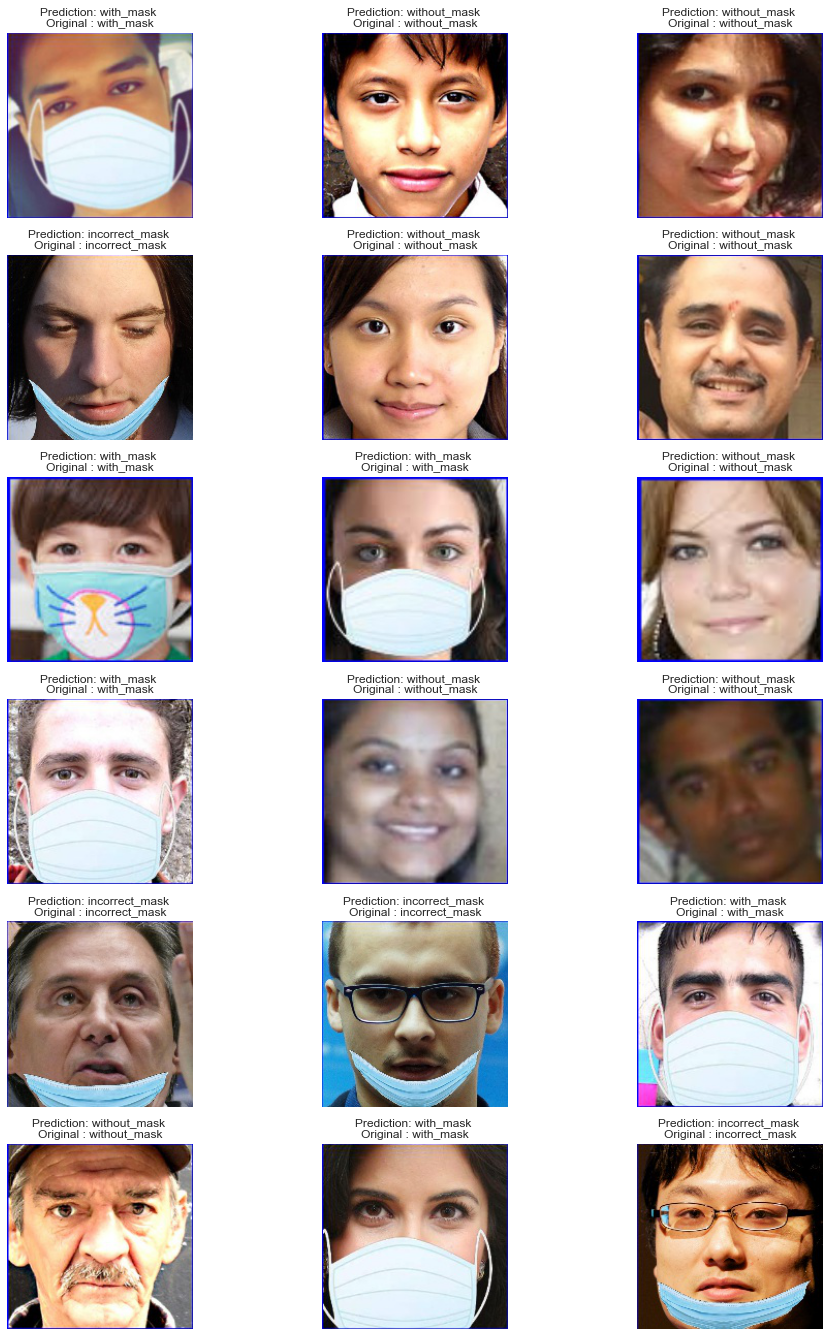

In [25]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
    image, label = test_data.next()

    model_pred = model.predict(image)

    plt.subplot(6,3,i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
    plt.subplots_adjust(top= 1.25)
    plt.axis("off")

In [26]:
//////////////////////////////////////////////////////////////

SyntaxError: invalid syntax (2043845625.py, line 1)

In [27]:
epoch 100

SyntaxError: invalid syntax (949526548.py, line 1)

In [28]:
///////////////////////////////////////////////////////////////

SyntaxError: invalid syntax (494267571.py, line 1)

In [29]:
type(fit_history.history)

dict

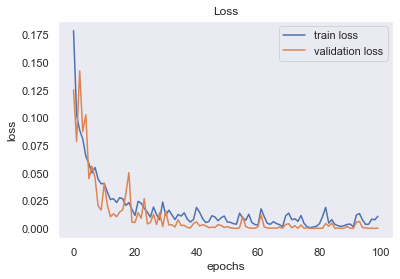

In [31]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(fit_history.history['loss'], label='train loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

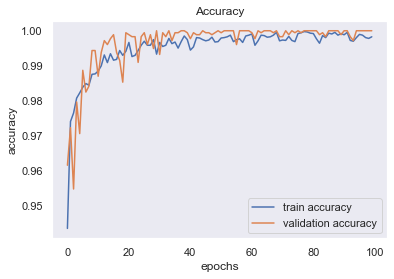

In [32]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(fit_history.history['accuracy'], label='train accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()